# **Concepts Covered:**

- <a href = #link6>One Sample T-test for Population Mean $\mu$</a>
- <a href = #link7>Two Independent Sample Z-test for Equality of Means</a>
- <a href = #link8>Two Independent Sample T-test for Equality of Means - Equal Std Dev</a>
- <a href = #link9>Two Independent Sample T-test for Equality of Means - Unequal Std Dev</a>
- <a href = #>Paired test for equality of means [*additional content*]</a>
- <a href = #link10>One Proportion Z-test</a>
- <a href = #link11>Two Proportion Z-test</a>
- <a href = #>Chi-Square Test for Variance [*additional content*]</a>
- <a href = #>F-test for Equality of Variances [*additional content*]</a>
- <a href = #link14>Chi-Square Test for Independence</a>
- <a href = #link15>One-way ANOVA Test</a>











**Note** : The 'Paired test for equality of means', 'Chi-Square Test for Variance', and 'F-test for Equality of Variances' sections are available as additional content. Please refer the hands-on notebook in 'Week 3: Additional Learning Material'.

## **Note**: The parameter `'alternative'` has been introduced in the SciPy version 1.6.0. Hence, it is necessary to install the required Scipy version in the system to run the code without errors.

In [5]:
# import the scipy and check the version to be sure that the version is above 1.6.1.
import scipy
scipy.__version__

'1.13.1'

In [6]:
# if the scipy version is lower than 1.6.1, then uncomment the below code to update the scipy package.
#!pip install --upgrade scipy

## Import the required packages

In [7]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

# <a name='link6'>**One Sample T-test for Population Mean $\mu$**</a>

### Let's revisit the example
A certain food aggregator ZYX is facing stiff competition from its main rival SWG during Corona period. To retain business, ZYX is advertising that, within a radius of 5 km from the restaurant where the order is placed, it can still deliver in 40 minutes or less on the average (and changed condition has not made any impact on them).

The delivery times in minutes of 25 randomly selected deliveries are given in a CSV file.

Assuming the delivery distribution is approximately normal, is there enough evidence that ZYX’s claim is false?


### Let's write the null and alternative hypothesis
Let $\mu$ be the mean delivery time of the ZYX food aggregator.

We will test the null hypothesis

>$H_0:\mu = 40$

against the alternate hypothesis

>$H_a:\mu > 40$



In [8]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Python Course'

Mounted at /content/drive


### Let's have a look on the sample data

In [9]:
fastfood = pd.read_csv(f"{path}/FastFood1.csv")
fastfood.head()

,Delivery,Time
0,1,39.4
1,2,39.5
2,3,39.7
3,4,40.7
4,5,40.4


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the delivery time is measured on a continuous scale.

*   Normally distributed population and Sample size < 30 - Yes, it is assumed that the population is normal and the sample size is 25 which is less than 30.
*   Observations are from a simple random sample - Yes, we are informed that the collected sample a simple random sample.
*   Population standard deviation is known - No

Voila! We can use T-test for this problem.

### Let's find the p-value

The [`ttest_1samp()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html) function of Scipy will be used to compute the test statistic and p-value.

In [10]:
#import the required functions
from scipy.stats import ttest_1samp

# calculate the test statistic and p-value
test_stat, p_value = ttest_1samp(fastfood['Time'], popmean = 40, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  1.4822680927543513e-05


### Insight
As the p-value is much less than the level of significance, we can reject the null hypothesis. Hence, we do not have enough significance to conclude that the mean delivery time within 5 km radius is indeed 40 min or less, as claimed by ZYX in their advertisement.



# <a name='link7'>**Two Independent Sample Z-test for Equality of Means**</a>

### Let's revisit the example

To compare customer satisfaction levels of two competing media channels, 150 customers of Channel 1 and 300 customers of Channel 2 were randomly selected and were asked to rate their channels on a scale of 1-5, with 1 being least satisfied and 5 most satisfied (The survey results are summarized in a CSV file). Suppose we know that, $\sigma_1$ = 0.48 and $\sigma_2$ = 0.49.

Test at 0.05 level of significance whether the data provide sufficient evidence to conclude that channel 1 has a higher mean satisfaction rating than channel 2.


### Let's write the null and alternative hypothesis
Let $\mu_1, \mu_2$ be the mean customer rating of channel 1 and channel 2 respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Let's have a look on the sample data

In [11]:
rating = pd.read_csv(f'{path}/rating.csv')
rating.head()

,channel1_rating,channel2_rating
0,3.5,3.3
1,3.7,3.3
2,3.0,2.9
3,3.8,3.7
4,3.3,4.0


In [12]:
# find the sample means and sample standard deviations for the two samples
print('The mean rating for channel 1 is ' + str(round(rating['channel1_rating'].mean(),1)))
print('The mean rating for channel 2 is ' + str(round(rating['channel2_rating'].mean(), 1)))

The mean rating for channel 1 is 3.5
The mean rating for channel 2 is 3.2




### Let's test whether the Z-test assumptions are satisfied or not

* Continuous data - The ratings are measured on a continuous scale.
* Normally distributed populations or Sample sizes > 30 - Since the sample sizes are greater than 30, Central Limit Theorem states that the distribution of sample means will be normal.
* Independent populations - As we are taking samples for two different channels, the two samples are from two independent populations.
* Known population standard deviation $\sigma_1$ and $\sigma_2$ - Yes, we know the population standard deviations of both the populations.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Voila! We can use two sample Z-test for this problem.

### Let's find the p-value

We are going to use the below formula to calculate the z score of the test using user defined function.

## $$z=\frac{(\bar{x_1} - \bar{x_2}) - (\mu_1 - \mu_2 )}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}$$

where
- $\bar{x_1}$: Sample mean of the first independent sample (sample 1)
- $\bar{x_2}$: Sample mean of the second independent sample (sample 2)
- $\mu_1$: Population mean of the first population
- $\mu_2$: Population mean of the second population
- $\sigma_1$: Population standard deviation of the first population
- $\sigma_2$: Population standard deviation of the second population
- $n_1$: Sample size of the sample from the first population
- $n_2$: Sample size of the sample from the second population

In the above formula, the denominator is calculating the standard error for the difference of means. For the calculation of standard error of a single sample, we use the following formula:

$$\text{Standard error} = \sqrt{\frac{\sigma^2}{n}}$$

As we have two populations, we cannot use the same formula in this case. So, we add the squares of the standard errors of the individual populations and then take it's square root to get the standard error for the difference of two means.

In [13]:
# user-defined function to compare the equality of two means from two independent populations, where population standard deviations are known
# this function returns the p-value for one tailed test
# for two-tailed test, multiply the p-value by 2
# To know more about the derivation of test statistic and standard error formula, please refer to the monographs and additional materials
def ztest_2samp(X1, X2, pop_sd1, pop_sd2, n1, n2):
    '''
    X1 - first of the two independent samples (sample 1)
    X2 - second of the two independent samples (sample 2)
    pop_sd1 - population standard deviation of sample 1
    pop_sd2 - population standard deviation of sample 2
    n1 - size of sample 1
    n2 - size of sample 2
    '''
    from numpy import sqrt, abs # import the required functions
    from scipy.stats import norm # import the required function
    se = sqrt(pop_sd1**2/n1 + pop_sd2**2/n2) # calculate the standard error.
    test_stat = ((X1.mean() - X2.mean()) - 0)/ se # calculate the test statistic
    '''
    For the problem at hand, the null hypothesis is that the two population means are equal, i.e., mu_1 = mu_2.
    Thus, the difference (mu_1 - mu_2) becomes zero.
    '''
    pval = 1 - norm.cdf(abs(test_stat)) # calculate the one-tailed p-value
    '''
    The abs() function is used to calculate the absolute value of the input.
    For example, abs(-5) = 5.
    '''
    return pval # return the p-value

In [14]:
# find the p-value using the user defined ztest_2samp() function
p_value = ztest_2samp(rating['channel1_rating'].dropna(), rating['channel2_rating'], 0.48, 0.49, 150 ,300)
print('The P-value is', p_value)

The P-value is 5.87973714161194e-09


### Insight

As the p-value is much less than the level of significance 0.05, we reject the null hypothesis. Thus, we have enough statistical evidence to say that channel 1 has a higher mean satisfaction rating than channel 2.

# <a name='link8'>**Two Independent Sample T-test for Equality of Means - Equal Std Dev**</a>


### Let's revisit the example


In the lockdown period, because of working from home and increased screen time, many opted for listening to FM Radio for entertainment rather than watching Cable TV. An advertisement agency randomly collected daily usage time data (in minutes) from both type of users and stored it in a CSV file.

Assuming daily Radio and TV usage time are normally distributed, do we have enough evidence to conclude that there is any difference between daily TV and Radio usage time at 0.05 significance level?


### Let's write the null and alternative hypothesis
Let $\mu_1, \mu_2$ be the daily mean Radio usage time and TV usage time respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1\neq\mu_2$



### Let's have a look on the sample data

In [15]:
tvradio = pd.read_csv(f'{path}/TVRadio.csv')
tvradio.head()

,Cable_TV,FM_Radio
0,22,25
1,8,10
2,25,29
3,22,19
4,12,13


In [16]:
# find the sample means and sample standard deviations for the two samples
print('The mean usage time of cable TV is ' + str(tvradio['Cable_TV'].mean()))
print('The mean usage time of FM radio is ' + str(tvradio['FM_Radio'].mean()))
print('The standard deviation of usage time of cable TV is ' + str(round(tvradio['Cable_TV'].std(),2)))
print('The standard deviation of usage time of FM radio is ' + str(round(tvradio['FM_Radio'].std(),2)))

The mean usage time of cable TV is 18.8
The mean usage time of FM radio is 20.0
The standard deviation of usage time of cable TV is 5.41
The standard deviation of usage time of FM radio is 5.42


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the usage time is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different type of users, the two samples are from two independent populations.
* Equal population standard deviations - As the sample standard deviations are almost equal, the population standard deviations may be assumed to be equal.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Voila! We can use two sample T-test for this problem.



### Let's find the p-value

The [`ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) function of Scipy will be used to compute the test statistic and p-value.

In [17]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(tvradio['Cable_TV'], tvradio['FM_Radio'], equal_var = True, alternative = 'two-sided')
print('The p-value is ' + str(p_value))

The p-value is 0.5491435225558506


### Insight
As the p-value(~0.55) is much greater than the level of significance, we can not reject the null hypothesis. Hence, we do not have enough significance to conclude that there is any difference between daily TV and Radio usage at 0.05 significance level.

# <a name='link9'>**Two Independent Sample T-test for Equality of Means - Unequal Std Dev**</a>



### Let's revisit the example

SAT verbal scores of two groups of students are given in a CSV file. The first group, College, contains scores of students whose parents have at least a bachelor's degree and the second group, High School, contains scores of students whose parents do not have any college degree.

The Education Department is interested to know whether the sample data support the theory that students show a higher population mean verbal score on SAT if their parents attain a higher level of education.

Assuming SAT verbal scores for two populations are normally distributed, do we have enough statistical evidence for this at 5% significance level?

### Let's write the null and alternative hypothesis


Let $\mu_1, \mu_2$ be the mean SAT verbal scores of **College** and **High School** groups respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Let's have a look on the sample data

In [18]:
# import the data
satscore = pd.read_csv(f'{path}/SATVerbal1.csv')
satscore.head()

,College,High School
0,485,489.0
1,534,507.0
2,650,447.0
3,554,515.0
4,550,470.0


In [19]:
# find the sample means and sample standard deviations for the two samples
print('The mean SAT verbal score for College group is ' + str(satscore['College'].mean()))
print('The mean SAT verbal score for High School group is ' + str(satscore['High School'].mean()))
print('The standard deviation of SAT verbal score for College group is ' + str(round(satscore['College'].std(), 2)))
print('The standard deviation of SAT verbal score for High School group is ' + str(round(satscore['High School'].std(), 2)))

The mean SAT verbal score for College group is 525.0
The mean SAT verbal score for High School group is 480.0
The standard deviation of SAT verbal score for College group is 59.42
The standard deviation of SAT verbal score for High School group is 31.1


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the SAT score is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

Voila! We can use two sample T-test for this problem.



### Let's find the p-value

The [`ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) function of Scipy will be used to compute the test statistic and p-value.

In [20]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(satscore['College'], satscore['High School'].dropna(), equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.008034956026490195


### Insight
As the p-value (~0.008) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that students show a higher population mean verbal score on SAT if their parents attain a higher level of education.

In [21]:
import scipy.stats as stats
import numpy as np

# scores of two groups (0 and 1) of students
scores = np.array([[49, 0],[53, 1],[56, 1],[43, 1],[45, 1],[53, 1],[45, 1],[56, 1],[51, 0],[43, 0],[47, 1],[44, 0],[51, 0],[53, 1],[50, 0],[54, 0],[51, 0],[51, 1],[46, 0],[47, 1]])

# Separating the data into 2 groups

group1 = scores[scores[:, 1] == 0] # elements of the array where group == 0
group1 = group1[:, 0] # scores of group 0 students
group2 = scores[scores[:, 1] == 1] # elements of the array where group == 1
group2 = group2[:, 0] # scores of group 1 students

#applying t-test to check if the scores of group 0 and group 1 students are indeed different
stats.ttest_ind(group1, group2, equal_var = False)

TtestResult(statistic=-0.607694899652158, pvalue=0.5509860214402561, df=17.98688825272457)


# <a name='link10'>**One Proportion Z-test**</a>

### Let's revisit the example

A researcher claims that Democratic party will win in the next United States Presidential election.

To test her belief the researcher randomly surveyed 90 people and 24 out of them said that they voted for Democratic party.

Is there enough evidence at 𝛂 = 0.05 to support this claim?


### Let's write the null and alternative hypotheses

The claim is that the Democratic party will win in the next United States Presidential election. In order to win the election, the Democratic party will need more than half of the total votes. If $p$ denotes the proportion of people who voted for the Democratic party, then $p$ should be greater than 0.5 for them to win (i.e., the proportion of people voting for the Democratic party should be greater than 50%)

The researcher will test the null hypothesis

>$H_0:p \leq 0.5$

against the alternate hypothesis

>$H_a:p > 0.5$

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, people either vote for Democratic or Republic party
*   Random sampling from the population - Yes, the researcher conducted a random survey
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np = 90\cdot \frac{24}{90} =24 \geq 10\\
n(1-p) = 90 \cdot \frac{90-24}{90} =66 \geq 10$


### Let's find the p-value

In this case the test statistic is calculated using the [`proportions_ztest()`](https://www.statsmodels.org/devel/generated/statsmodels.stats.proportion.proportions_ztest.html) function of statsmodels. The function is used as follows:

`proportions_ztest(count, nobs, value=None, alternative='two-sided')`

where

- `count`: the number of successes in nobs trials.
- `nobs`: the number of trials or observations, with the same length as count.
- `value`: This is the value of the null hypothesis equal to the proportion in the case of a one-sample test. In the case of a two-sample test, the null hypothesis is that prop[0] - prop[1] = value, where prop is the proportion in the two samples. If not provided value = 0 and the null is prop[0] = prop[1]
- `alternative`: This decides the tail of the test. It can take the values : [‘two-sided’, ‘smaller’, ‘larger’]

In [22]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest(24, 90, value = 0.5, alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.9999997216721324


### Insight

As the p-value is much greater than the significance level 0.05, we can not reject the null hypothesis. Thus, the researcher do not have enough statistical significance to claim that Democratic party will win in the next United States Presidential election at 5% significance level.

In [23]:
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest(count = 129, nobs = 150, value = 0.9, alternative = 'smaller')

(-1.4118624160050361, 0.07899523801234237)

# <a name='link11'>**Two Proportion Z-test**</a>

### Let's revisit the example

A car manufacturer aims to improve its products' quality by reducing the defects. So, the manufacturer randomly checks the efficiency of two assembly lines in the shop floor. In line 1, there are 20 defects out of 200 samples and In line 2, there are 25 defects out of 400 samples.

At 5% level of significance, do we have enough statistical evidence to conclude that the two assembly procedures are different?


### Let's write the null and alternative hypothesis
Let $p_1,p_2$ be the proportions of defects in assembly line 1 and line 2 respectively.

The manufacturer will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 \neq p_2$

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a product is either defective or non-defective.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 200\cdot \frac{20}{200} =20 \geq 10\\
n(1-p_1) = 200 \cdot \frac{200-20}{200} =180 \geq 10 \\
np_2 = 400\cdot \frac{25}{400} =25 \geq 10\\
n(1-p_2) = 400 \cdot \frac{400-25}{400} =375 \geq 10 $


### Let's find the p-value

This test uses the same [`proportions_ztest()`](https://www.statsmodels.org/devel/generated/statsmodels.stats.proportion.proportions_ztest.html) function as used in the one proportion z-test. The only difference here is that we are using it for comparing two proportions.

In [24]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of defective items
defect_count = np.array([20, 25])

# set the sample sizes
nobs = np.array([200, 400])

# find the p-value
test_stat, p_value = proportions_ztest(defect_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.10017829422626796


### Insight

As the p-value is greater than the significance level 0.05, we can not reject the null hypothesis. Thus, the manufacturer do not have enough statistical significance to conclude that the two assembly procedures are different.

In [25]:
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest(count = [20, 40], nobs = [100, 150], value = 0, alternative = 'smaller')

(-1.2091270835166859, 0.11330701279287875)

# <a name='link14'>**Chi-Square Test for Independence**</a>

### Let's revisit the example

The beverage preference data for different age groups has given in the Beverage.csv file.

Do we have enough statistical evidence to conclude that beverage preference depend on age.



### Let's have a look on the sample data

In [26]:
beverage = pd.read_csv(f'{path}/Beverage.csv')
beverage.head()

,Age,Tea/Coffee,Soft Drink,Others
0,21 - 34,25,90,20
1,35 - 55,40,35,25
2,> 55,24,15,30


### Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ Beverage preference is independent of age.

against the alternate hypothesis

>$H_a:$ Beverage preference depends on age.

### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


### Let's find the p-value

The [`chi2_contingency()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) function of Scipy will be used to compute the test statistic and p-value.

In [45]:
# import the required function
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import norm


# find the p-value
chi, p_value, dof, expected = chi2_contingency(beverage.drop('Age', axis = 1))
print('The p-value is', p_value)
print('The p-chi stats is', chi)
print('The p-df is', dof)
print('The expected is', expected)


The p-value is 5.410957050304089e-10
The p-chi stats is 49.15840930376024
The p-df is 4
The expected is [[39.52302632 62.17105263 33.30592105]
 [29.27631579 46.05263158 24.67105263]
 [20.20065789 31.77631579 17.02302632]]


In [42]:
critical_value = chi2.ppf(0.95, df=dof)
critical_value

9.487729036781154

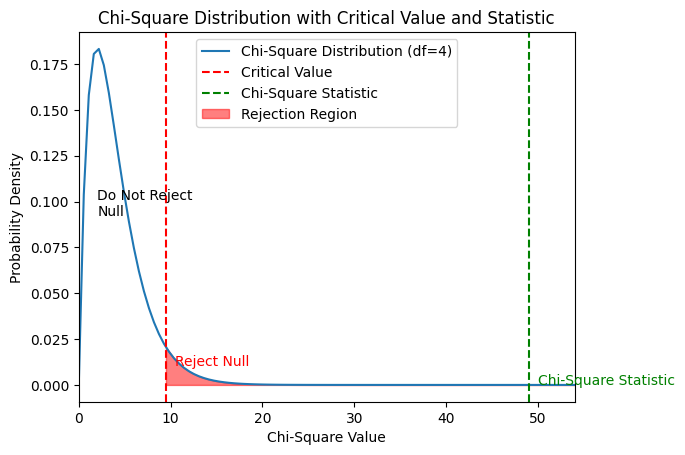

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Parameters
dof = 4  # Degrees of freedom
alpha = 0.05  # Significance level

# Calculate critical value
critical_value = chi2.ppf(1 - alpha, df=dof)

# Example Chi-Square statistic (for demonstration)
chi2_statistic = 49

# Determine plot range dynamically
x_min = 0
x_max = max(chi2_statistic + 5, critical_value + 10)  # Ensure range covers both statistic and critical value

# Data for plotting
x = np.linspace(x_min, x_max, 100)
pdf = chi2.pdf(x, df=dof)

# Plot the Chi-Square distribution
plt.plot(x, pdf, label=f'Chi-Square Distribution (df={dof})')

# Plot the critical value line
plt.axvline(x=critical_value, color='r', linestyle='--', label='Critical Value')

# Plot the observed Chi-Square statistic line
plt.axvline(x=chi2_statistic, color='g', linestyle='--', label='Chi-Square Statistic')

# Shade the rejection region
x1 = np.linspace(critical_value, x_max, 50)
plt.fill_between(x1, chi2.pdf(x1, df=dof), color='r', alpha=0.5, label='Rejection Region')

# Annotations
plt.annotate('Reject Null', (critical_value + 1, chi2.pdf(critical_value, df=dof) * 0.5), color='r')
plt.annotate('Chi-Square Statistic', (chi2_statistic + 1, chi2.pdf(chi2_statistic, df=dof) * 0.5), color='g')
plt.annotate('Do Not Reject\nNull', (2, chi2.pdf(2, df=dof) * 0.5), color='black')

# Labels and Title
plt.xlabel('Chi-Square Value')
plt.ylabel('Probability Density')
plt.title('Chi-Square Distribution with Critical Value and Statistic')
plt.legend()

# Show plot
plt.xlim(x_min, x_max)  # Adjust x-axis limits based on the range
plt.show()



### Insight
As the p-value is much less than the significance level, we can reject the null hypothesis. Hence, we do have enough statistical significance to conclude that beverage preference is not independent of age at 5% significance level.

# <a name='link15'>**One-way ANOVA Test**</a>

### Let's revisit the example

Traffic management inspector in a certain city wants to understand whether carbon emissions from different cars are different. The inspector has reasons to believe that Fuel type may be the factors responsible for differences in carbon emission.

For this purpose, the inspector has taken random samples from all registered cars on the road in that city and would like to test if the amount of carbon emission release depends on fuel type at 5% significance level.

### Let's have a look on the sample data

In [62]:
aovdata = pd.read_csv(f'{path}/AOVData.csv')
aovdata.head()

,Car_ID,manufacturer,fuel_type,co_emissions
0,1,Audi,Petrol,441.55
1,2,BMW,E85,376.47
2,3,BMW,E85,414.12
3,4,BMW,E85,351.41
4,5,Volvo,E85,284.59


Here, co_emissions is the response and fuel_type is the factor.

In [29]:
# get the levels of factor fuel_type
aovdata['fuel_type'].value_counts()

,count
fuel_type,
Petrol,179
LPG,170
E85,161


### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of carbon dioxide emissions for fuel type E85, LPG and Petrol respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one carbon emission level is different from the rest.


fuel_type
E85       338.124534
LPG       363.744412
Petrol    371.722961
Name: co_emissions, dtype: float64


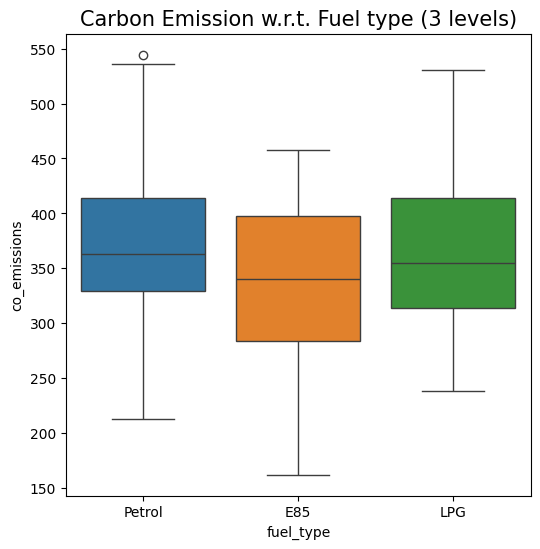

In [63]:
# mean of carbon emission at different levels of the fuel_type factor
print(aovdata.groupby("fuel_type")["co_emissions"].mean())

# draw the boxplot for visualization
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "fuel_type", y = 'co_emissions' , data = aovdata, hue = 'fuel_type')
a.set_title("Carbon Emission w.r.t. Fuel type (3 levels)", fontsize=15)
plt.show()

Now, the normality and equality of variance assumptions need to be checked.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Carbon emission follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Carbon emission does not follow a normal distribution

The [`shapiro()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) function of Scipy will be used to compute the test statistic and p-value.

In [31]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(aovdata['co_emissions'])
print('The p-value is', p_value)

The p-value is 0.49709524943766514


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

The [`levene()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) function of Scipy will be used to compute the test statistic and p-value.

In [32]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( aovdata['co_emissions'][aovdata['fuel_type']=="Petrol"],
                                   aovdata['co_emissions'][aovdata['fuel_type']=="E85"],
                                   aovdata['co_emissions'][aovdata['fuel_type']=="LPG"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.19437768490117


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.



### Let's find the p-value

The [`f_oneway()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) function of Scipy will be used to compute the test statistic and p-value.

In [33]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(aovdata.loc[aovdata['fuel_type'] == 'Petrol', 'co_emissions'],
                              aovdata.loc[aovdata['fuel_type'] == 'E85', 'co_emissions'],
                              aovdata.loc[aovdata['fuel_type'] == 'LPG', 'co_emissions'])
print('The p-value is ' + str(p_value))

The p-value is 8.274439764368132e-06


### Insight
As the p-value is much less than the significance level, we can reject the null hypothesis. Hence, we do have enough statistical significance to conclude that  at least one carbon emission level is different from the rest at 5% significance level.

However, we don't know which mean is different from the rest or whether all pairs of means are different. Multiple comparison tests are used to test the differences between all pairs of means.

### Multiple Comparison test (Tukey HSD)


In order to identify for which fuel type mean carbon emission is different from other groups, the null hypothesis is

  > $𝐻_0: 𝜇_1=𝜇_2 \text{ and } 𝜇_1=𝜇_3 \text{ and } 𝜇_2=𝜇_3$

against the alternative hypothesis

 > $𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$

The [`pairwise_tukeyhsd()`](https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html) function of Statsmodels will be used to compute the test statistic and p-value.

In [34]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = aovdata['co_emissions'], groups = aovdata['fuel_type'], alpha = 0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   E85    LPG  25.6199 0.0012  8.6843 42.5554   True
   E85 Petrol  33.5984    0.0 16.8712 50.3256   True
   LPG Petrol   7.9785 0.4916 -8.5139  24.471  False
----------------------------------------------------


### Insight

As the p-values (refer to the p-adj column) for comparing the mean carbon emissions for the pair E85-LPG and E85-Petrol is less than the significance level, the null hypothesis of equality of all population means can be rejected.

Thus, we can say that the mean carbon emission for Petrol and LPG is similar but emission for fuel type E85 is significantly different from LPG and Petrol.

# ---------------------------------------------**The End**-------------------------------------------------